In [1]:
#Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
print('imported')

imported


In [2]:
#read in raw data
lego_raw_df = pd.read_csv('legoData.csv',index_col = 0)

# info() to see what has the most nulls
lego_raw_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 19145 entries, 0 to 19144
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Set_number     19145 non-null  object 
 1   Name           19144 non-null  object 
 2   Set_type       19144 non-null  object 
 3   Theme          19144 non-null  object 
 4   Theme_group    19143 non-null  object 
 5   Subtheme       15561 non-null  object 
 6   Year_released  19144 non-null  float64
 7   Pieces         15297 non-null  float64
 8   Minifigs       8456 non-null   float64
 9   Price          19145 non-null  float64
 10  Age_range      7032 non-null   object 
dtypes: float64(4), object(7)
memory usage: 1.8+ MB


In [3]:
# describe() to see some of the basic stats
lego_raw_df.describe()


,Year_released,Pieces,Minifigs,Price
count,19144.000000,15297.000000,8456.000000,19145.000000
mean,2006.394693,224.932993,2.672304,18.556218
std,14.598790,469.083890,2.898825,39.792932
min,1949.000000,0.000000,1.000000,0.000000
25%,2000.000000,22.000000,1.000000,0.000000
50%,2011.000000,69.000000,2.000000,4.990000
75%,2017.000000,241.000000,3.000000,19.990000
max,2023.000000,11695.000000,80.000000,849.990000


In [4]:
#First to take a look at the set that is missing a name:
lego_raw_df.loc[lego_raw_df.Name.isna()]


,Set_number,Name,Set_type,Theme,Theme_group,Subtheme,Year_released,Pieces,Minifigs,Price,Age_range
5830,KC028-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN


In [5]:
#This page was either moved or the scraper picked up an incorrect ID so we'll remove it for now
lego_mod_df = lego_raw_df.dropna(subset=['Name'])

In [6]:
#next to check on the 80 minifigs, that seems like a lot
lego_raw_df.loc[lego_raw_df.Minifigs==80]

,Set_number,Name,Set_type,Theme,Theme_group,Subtheme,Year_released,Pieces,Minifigs,Price,Age_range
1599,3695-1,Figure collection,Normal,FABULAND,Junior,NaN,1982.0,NaN,80.0,0.0,NaN


In [7]:
#This set seems like it was a promotional piece, and not a lot is known about it, including price.
#I think the thing to do here would be remove all entries that have no Price data, or have a 0 price
#as they could be promotional, or they might just be more mystery sets that do not have a lot of info surrounding them

lego_mod_df = lego_raw_df.dropna(subset=['Price'])
lego_mod_df = lego_mod_df[lego_mod_df.Price !=0.00]

#Then redescribe to see how that changes things
lego_mod_df.describe()

,Year_released,Pieces,Minifigs,Price
count,11384.000000,9413.000000,6164.000000,11384.000000
mean,2010.200545,289.558483,2.866807,31.206852
std,10.571208,546.873550,2.682497,47.626474
min,1961.000000,0.000000,1.000000,0.400000
25%,2004.000000,34.000000,1.000000,6.990000
50%,2013.000000,109.000000,2.000000,15.000000
75%,2018.000000,333.000000,4.000000,37.500000
max,2023.000000,11695.000000,33.000000,849.990000


In [8]:
#33 still seems like a lot of minifigs for one set, but we'll look at the histograms in a moment and see what they tell
#while 11695 pieces and 849.99 might seem like large values for lego sets. I happen to know which sets these are referring to
#and that they are legitimate sets

#separate into numeric and categorical features:
lego_num = lego_mod_df[['Year_released', 'Pieces', 'Minifigs', 'Price']]
lego_cat = lego_mod_df[['Set_number', 'Name', 'Set_type', 'Theme', 'Theme_group', 'Subtheme', 'Age_range']]


In [9]:
#Check for nulls in numerical data
for i in lego_num.columns:
    print("Unique "+ str(i)+ "s: "+ str(len(lego_num[i].unique())))
    print("Nulls in "+ str(i)+ ": "+ str(lego_num[i].isna().sum()))

Unique Year_releaseds: 62
Nulls in Year_released: 0
Unique Piecess: 1358
Nulls in Pieces: 1971
Unique Minifigss: 30
Nulls in Minifigs: 5220
Unique Prices: 390
Nulls in Price: 0


In [10]:
#We are going to drop the null pieces and any that are set to 0 for some reason:
lego_mod_df = lego_mod_df.dropna(subset=['Pieces'])

lego_mod_df = lego_mod_df[lego_mod_df.Pieces !=0.00]

#we are going to set NaN minifigs to 0. This should be correct in the vast majority of cases

lego_mod_df.Minifigs = lego_mod_df.Minifigs.fillna(0)
lego_num = lego_mod_df[['Year_released', 'Pieces', 'Minifigs', 'Price']]
for i in lego_num.columns:
    print("Unique "+ str(i)+ "s: "+ str(len(lego_num[i].unique())))
    print("Nulls in "+ str(i)+ ": "+ str(lego_num[i].isna().sum()))

Unique Year_releaseds: 62
Nulls in Year_released: 0
Unique Piecess: 1356
Nulls in Pieces: 0
Unique Minifigss: 29
Nulls in Minifigs: 0
Unique Prices: 373
Nulls in Price: 0


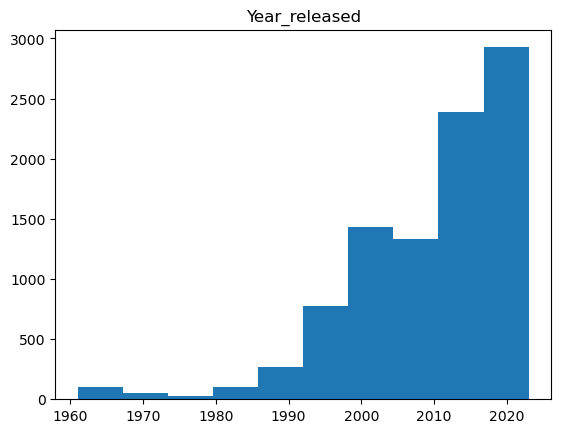

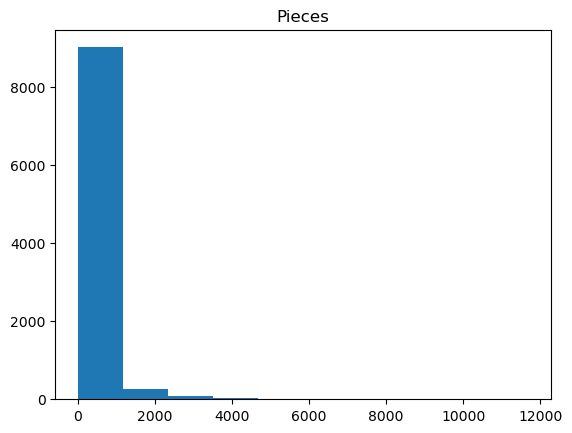

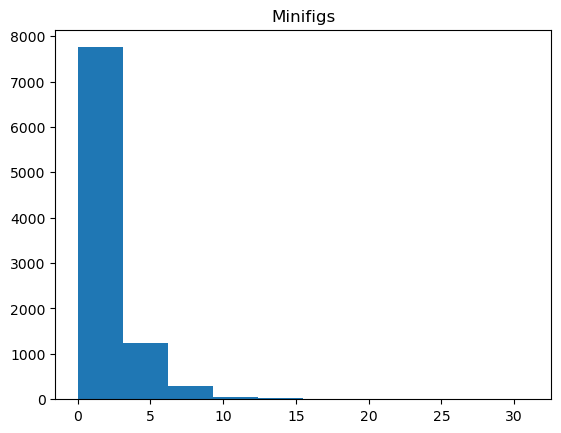

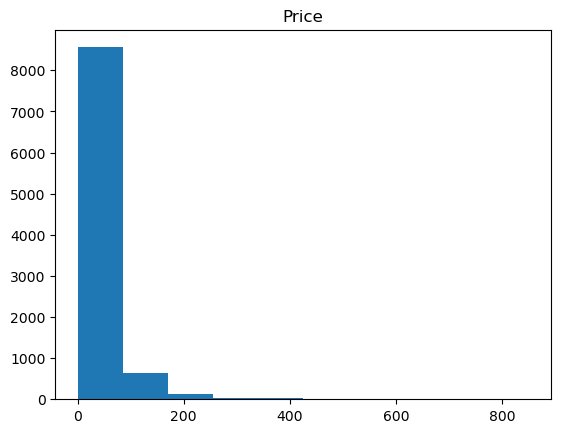

In [11]:
#histograms for all numerical features

for i in lego_num.columns:
    plt.hist(lego_num[i])
    plt.title(i)
    plt.show()
    

               Year_released    Pieces  Minifigs     Price
Year_released       1.000000  0.170119  0.129090  0.179645
Pieces              0.170119  1.000000  0.321924  0.856224
Minifigs            0.129090  0.321924  1.000000  0.382188
Price               0.179645  0.856224  0.382188  1.000000


<AxesSubplot: >

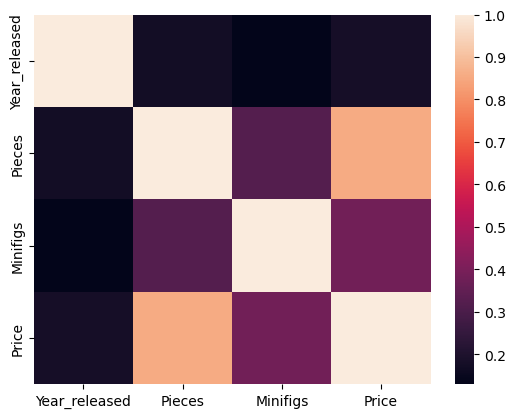

In [12]:
#Before moving on a couple of things to note, all of the data is quite heavily skewed. They high piece count and high 
#price sets are both outliers. Perhaps normalize? Then Scale

#First some correlations
print(lego_num.corr())
sns.heatmap(lego_num.corr())


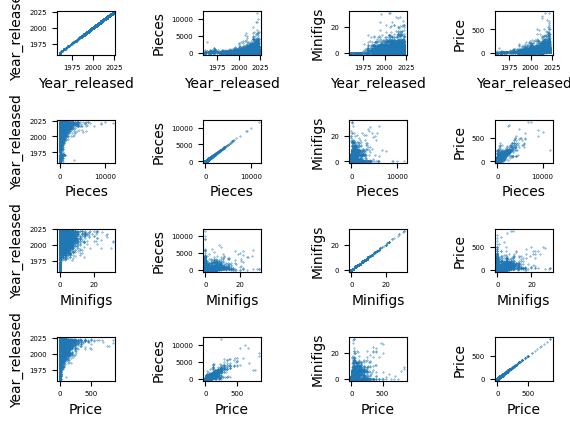

In [13]:
#Observations:
#Pieces and price are very heavily correlated
#Minifigs and price are also  correlated
#No correlation between year released and number of minifigs
#slightly higher for year released and pieces and price.
#If price is what we want to end up predicting for new sets, then pieces and minifigs are definitely worth exploring

#Maybe scatter plots might tell us some more. 
#If we're looking at predictors of price, we'll put price on Y and the other variables on X
figure, axis = plt.subplots(4,4)
for c,i in enumerate(lego_num.columns):
    for r,k in enumerate(lego_num.columns):
        axis[c, r].scatter(lego_num[i], lego_num[k], s=.1)
        axis[c, r].set(xlabel=i,ylabel=k)
        axis[c, r].tick_params(labelsize = 5)
plt.subplots_adjust(wspace=1.5,hspace=1.5)
plt.show()
                
#Note: The diagonals will all be straight lines

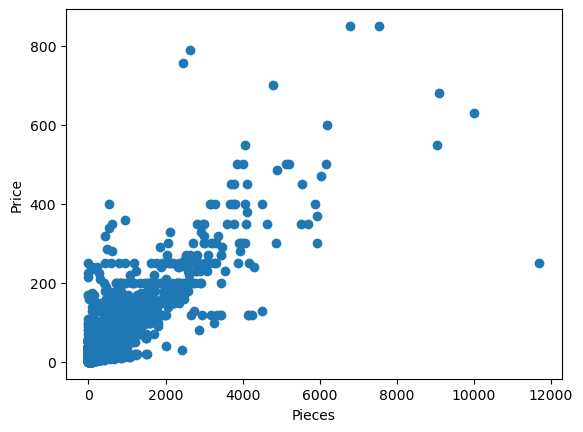

In [14]:
#these scatter plots show that the maximum price and pieces have both increased over the years
#it's also interesting to note that 

#we'll also take a more in depth look at pieces vs price, as these two are very correlated.
#So if we were predicting price this would bea key variable

plt.scatter(lego_num.Pieces, lego_num.Price)
plt.xlabel("Pieces")
plt.ylabel("Price")
plt.show()

In [15]:
#What this shows us is that there is quite a linear relationship,
#However, 11000 piece is priced very low. This is because all of the pieces are small
#It is also just a very well priced set. Maybe our categorical data will capture why. 
#This entry might be worth keepeing an eye on, the ID is 31203-1

#Next the categorical data.
#Lets look at the amount of unique values in each feature as well as the number of nulls
for i in lego_cat.columns:
    print("Unique "+ str(i)+ "s: "+ str(len(lego_cat[i].unique())))
    print("Nulls in "+ str(i)+ ": "+ str(lego_cat[i].isna().sum()))

#And also how many nulls there are in each column

Unique Set_numbers: 11384
Nulls in Set_number: 0
Unique Names: 10268
Nulls in Name: 0
Unique Set_types: 7
Nulls in Set_type: 0
Unique Themes: 149
Nulls in Theme: 0
Unique Theme_groups: 16
Nulls in Theme_group: 0
Unique Subthemes: 785
Nulls in Subtheme: 1888
Unique Age_ranges: 56
Nulls in Age_range: 5505


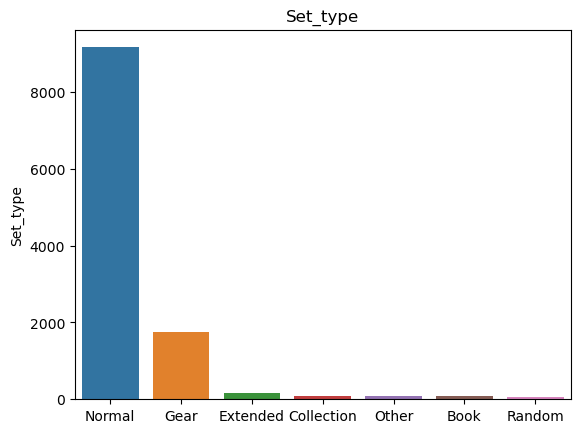

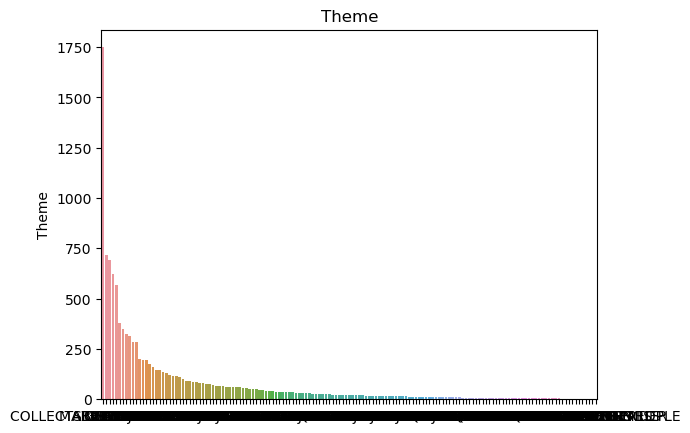

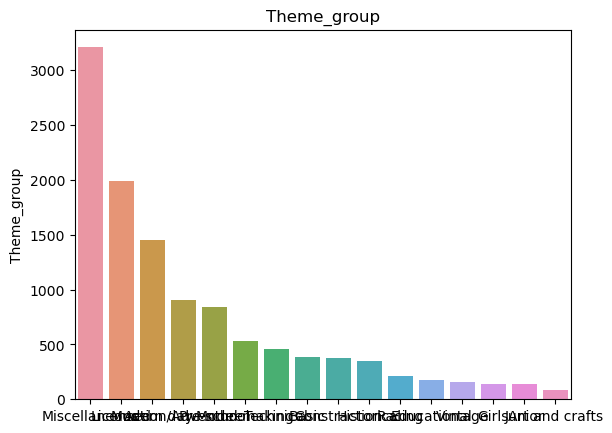

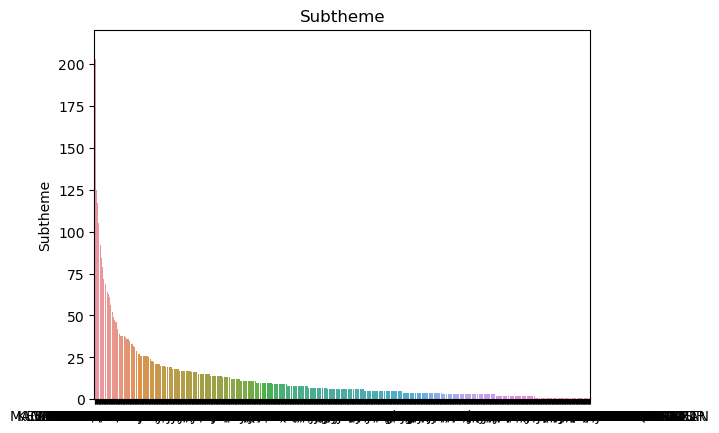

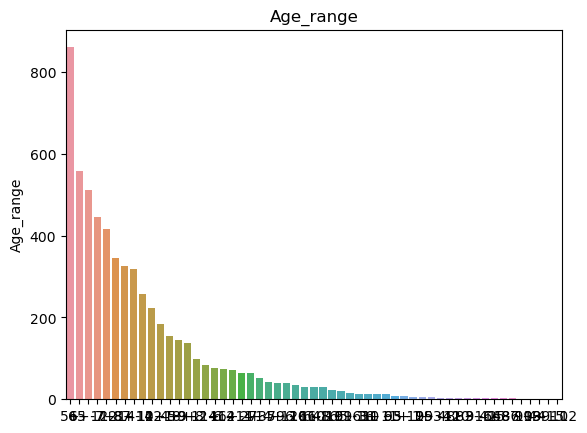

In [16]:
#a couple things to note from above. We have a lot of unique themes, and a lot of unique subthemes.
#every set has a theme and theme group
#only some sets have subthemes
#56 age ranges, and a lot of nulls in age range.

#we will print the counts of unique values in the =categorical columns, these will be impossible to distinguish, but might 
#point out any inconsistencies. We will be excluding Name and Id number as these are more indexes and unique to each set
for i in lego_cat.columns:
    if i not in ["Name","Set_number"]:
        plt.figure()
        sns.barplot(x=lego_cat[i].value_counts().index, y = lego_cat[i].value_counts()).set_title(i)
        plt.show
 

In [17]:
lego_mod_df.loc[lego_mod_df.Set_type=='Extended']


,Set_number,Name,Set_type,Theme,Theme_group,Subtheme,Year_released,Pieces,Minifigs,Price,Age_range
7945,4524081-1,Mindstorms NXT CD,Extended,MINDSTORMS,Technical,NXT,2007.0,1.0,0.0,19.99,NaN
8318,852271-1,Knights Battle Pack,Extended,CASTLE,Historical,BATTLE PACK,2008.0,35.0,5.0,14.99,NaN
8319,852272-1,Skeletons Battle Pack,Extended,CASTLE,Historical,BATTLE PACK,2008.0,43.0,5.0,14.99,NaN
8339,852331-1,Vintage Minifigure Collection Vol. 1,Extended,MISCELLANEOUS,Miscellaneous,MINIFIGURE COLLECTION,2008.0,21.0,5.0,17.99,6+
8743,852535-1,Vintage Minifigure Collection Vol. 2,Extended,MISCELLANEOUS,Miscellaneous,MINIFIGURE COLLECTION,2009.0,24.0,5.0,17.99,6+
...,...,...,...,...,...,...,...,...,...,...,...
19125,910002-1,Studgate Train Station,Extended,BRICKLINK,Model making,2021 DESIGNER PROGRAM,2023.0,4062.0,0.0,399.99,18+
19126,910004-1,Winter Chalet,Extended,BRICKLINK,Model making,2021 DESIGNER PROGRAM,2023.0,2705.0,0.0,199.99,18+
19127,910008-1,Modular Construction Site,Extended,BRICKLINK,Model making,2021 DESIGNER PROGRAM,2023.0,3371.0,0.0,319.99,18+
19128,910011-1,1950's Diner,Extended,BRICKLINK,Model making,2021 DESIGNER PROGRAM,2023.0,1377.0,0.0,129.99,18+


In [18]:
#next I'm going to look at each feature in turn and see how we might engineer it and the data in order to get cleaner 
# for a model.
# Year_released, Pieces, Minifigs and Price all seem reasonable as they are. Howver when modeling to predict price,
#it might be worth putting in a cutoff year. As it might affect the model adversly, having data from the 70s and 80s.

#Let's turn to Set_Type, as it has the fewest numbers of unique entries, and so might allow us to remove large numbers
#of unnecessary data.

#It would seem that Book values should be removed as these are not lego sets
#Gear also seems to be key rings and such.
unwanted_Set_types = ['Book', 'GEAR']
lego_mod_df = lego_mod_df[~lego_mod_df.Set_type.isin(unwanted_Set_types)]


#examination of the "Extended" Set_type shows and item which is a CD-rom. These are clearly not lego sets,
#as such these should be removed. It would be difficult to go through every entry to see if it is a CD or not.
#An alternate solution is to put a minimum piece number on our data. By setting this to ten we also exclude 
# many of the mystery packets of individual minifigs, which  I am also excluding from this model.
#(Honestly, I'm just looking to predict the price of Star Wars ship sets based on rumours)
                                                     
lego_mod_df = lego_mod_df[lego_mod_df.Pieces >10]

#By examining Extended we see some from the "Bricklink". These sets are not related to Lego and are created by a third party site

unwanted_Themes = ['BRICKLINK']
lego_mod_df = lego_mod_df[~lego_mod_df.Theme.isin(unwanted_Themes)]
                                                     
                                                


In [19]:
#next we will look at the data for the collection Set_type
lego_mod_df.loc[lego_mod_df.Set_type=='Collection']

,Set_number,Name,Set_type,Theme,Theme_group,Subtheme,Year_released,Pieces,Minifigs,Price,Age_range
547,005-2,Discovery Set,Collection,SAMSONITE,Vintage,BASIC SET,1967.0,328.0,0.0,9.95,NaN
655,310-1,Motorized Truck Set,Collection,SAMSONITE,Vintage,MODEL MAKER,1969.0,184.0,0.0,12.95,NaN
2085,0011-3,2 For 1 Bonus Offer,Collection,CASTLE,Historical,BONUS/VALUE PACK,1987.0,151.0,0.0,1.50,NaN
2370,1616-1,Special Two-Set Space Pack,Collection,SPACE,Action/Adventure,BONUS/VALUE PACK,1989.0,132.0,0.0,10.00,NaN
2544,1675-1,Three Set Bonus Pack,Collection,ASSORTED,Miscellaneous,BONUS/VALUE PACK,1990.0,150.0,0.0,10.00,NaN
...,...,...,...,...,...,...,...,...,...,...,...
17809,5007060-1,The Team Up Bundle,Collection,SUPER MARIO,Licensed,PRODUCT COLLECTION,2021.0,511.0,0.0,119.98,NaN
17810,5007061-1,The Creative Bundle,Collection,SUPER MARIO,Licensed,PRODUCT COLLECTION,2021.0,1081.0,0.0,129.97,NaN
17811,5007062-1,The Ultimate Bundle,Collection,SUPER MARIO,Licensed,PRODUCT COLLECTION,2021.0,3009.0,0.0,299.95,NaN
18260,71034-13,LEGO Minifigures - Series 23 - Complete,Collection,COLLECTABLE MINIFIGURES,Miscellaneous,SERIES 23,2022.0,101.0,12.0,4.99,5+


In [21]:
#This seems reasonable at ag lance. So next is Random
lego_mod_df.loc[lego_mod_df.Set_type=='Random']

,Set_number,Name,Set_type,Theme,Theme_group,Subtheme,Year_released,Pieces,Minifigs,Price,Age_range
14790,41775-0,Blind Bags Series 1 {Random bag},Random,UNIKITTY,Licensed,BLIND BAGS SERIES 1,2018.0,14.0,0.0,3.99,5 - 12


In [22]:
#This is clearly not a lego set, but a blind bag, however, we can see from this that there is a blind bag subtheme
#I will remove rows where the subtheme has "BLIND BAG in the string."

lego_mod_df = lego_mod_df[lego_mod_df.Subtheme.str.contains("BLIND BAG", na=False) == False]


In [24]:
#and finally we will look at the "Other" Set_type
lego_mod_df.loc[lego_mod_df.Set_type=='Other']

,Set_number,Name,Set_type,Theme,Theme_group,Subtheme,Year_released,Pieces,Minifigs,Price,Age_range
223,214_10-2,1 x 2 x 4 Glass Door in Frame,Other,SAMSONITE,Vintage,SUPPLEMENTAL,1961.0,13.0,0.0,0.50,3 - 12
231,214_5-2,1 x 3 x 2 Window in Frame,Other,SAMSONITE,Vintage,SUPPLEMENTAL,1961.0,12.0,0.0,0.50,3 - 12
233,214_6-2,1 x 2 x 2 Window in Frame,Other,SAMSONITE,Vintage,SUPPLEMENTAL,1961.0,15.0,0.0,0.50,3 - 12
235,214_7-2,1 x 1 x 2 Window Frame,Other,SAMSONITE,Vintage,SUPPLEMENTAL,1961.0,19.0,0.0,0.50,3 - 12
237,214_8-2,1 x 2 x 1 Window Frame,Other,SAMSONITE,Vintage,SUPPLEMENTAL,1961.0,19.0,0.0,0.50,3 - 12
239,214_9-2,1 x 1 x 1 Window Frame,Other,SAMSONITE,Vintage,SUPPLEMENTAL,1961.0,20.0,0.0,0.50,3 - 12
240,225_A-1,1 x 6 Beams,Other,SAMSONITE,Vintage,SUPPLEMENTAL,1961.0,13.0,0.0,0.50,3 - 12
241,225_B-1,1 x 8 Beams,Other,SAMSONITE,Vintage,SUPPLEMENTAL,1961.0,12.0,0.0,0.50,3 - 12
248,521_2-1,1 x 1 and 1 x 2 Plates,Other,SAMSONITE,Vintage,SUPPLEMENTAL,1961.0,80.0,0.0,0.50,3 - 12
365,280_3-1,Assorted Bevelled Bricks,Other,SAMSONITE,Vintage,SUPPLEMENTAL,1965.0,34.0,0.0,0.50,NaN


In [25]:
#We can see upon running the command above for the first time there are many SUPPLEMENTAL but also PROMOTIONAL pieces in this 
#Set_type. These do not apply to sets bought in stores, and as such they will be removed from the data.

unwanted_Subtheme = ['SUPPLEMENTAL', 'PROMOTIONAL']
lego_mod_df = lego_mod_df[~lego_mod_df.Subtheme.isin(unwanted_Subtheme)]

#as well as this it would seem the Other set type does not contain any in store non promotional lego sets,
#so I'll be dropping any sets that are in this category.

lego_mod_df = lego_mod_df[lego_mod_df.Set_type!= 'Other']


In [26]:
#The Set types have provided an invaluable resource for weeding out items that are not true lego sets.
#By viewing the total counts we can see that ~13000 entries have been removed.
lego_mod_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8015 entries, 212 to 19112
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Set_number     8015 non-null   object 
 1   Name           8015 non-null   object 
 2   Set_type       8015 non-null   object 
 3   Theme          8015 non-null   object 
 4   Theme_group    8015 non-null   object 
 5   Subtheme       6335 non-null   object 
 6   Year_released  8015 non-null   float64
 7   Pieces         8015 non-null   float64
 8   Minifigs       8015 non-null   float64
 9   Price          8015 non-null   float64
 10  Age_range      4697 non-null   object 
dtypes: float64(4), object(7)
memory usage: 751.4+ KB


In [27]:
#Theme group is a feature to look at next, as it contains only 16 valid entries and no nulls.
#These are not readable from the bar chart, so I'll list them
lego_mod_df.Theme_group.unique()

array(['Vintage', 'Modern day', 'Basic', 'Educational', 'Miscellaneous',
       'Action/Adventure', 'Technical', 'Junior', 'Pre-school',
       'Historical', 'Model making', 'Girls', 'Racing', 'Licensed',
       'Constraction', 'Art and crafts'], dtype=object)

In [28]:
#These Theme_groups hold a lot of information, and may prove a valuable feature.
#One would expect the "Licensed" sets to be higher in price due to licensing fees.
#However, some of these values will need to be investigated to see if the warrant removal, in the same manner as Set_type.
#I will not list them out individually this time and will instead list and remove the unecessary values all at once

#Pre-school is removed as it contains mostly Duplo, which is not lego and is aimed at toddlers.
#we have also found the theme SCALA should be removed, as well as Belville and CLIKITS (this is the full Girls themegroup)

#We will also remove BIONICLE (even though they are near and dear to my heart). This is because they're not quite lego
#and HERO FACTORY themes.
Unwated_themegroups =['Pre-school']
lego_mod_df = lego_mod_df[~lego_mod_df.Theme_group.isin(Unwated_themegroups)]

Unwanted_themes =['SCALA','BELVILLE', 'CLIKITS','BIONICLE', 'HERO FACTORY']
lego_mod_df = lego_mod_df[~lego_mod_df.Theme.isin(Unwanted_themes)]



lego_mod_df.loc[lego_mod_df.Theme_group=='Pre-school']


,Set_number,Name,Set_type,Theme,Theme_group,Subtheme,Year_released,Pieces,Minifigs,Price,Age_range


In [29]:
lego_mod_df.loc[lego_mod_df.Theme=='SCALA']

,Set_number,Name,Set_type,Theme,Theme_group,Subtheme,Year_released,Pieces,Minifigs,Price,Age_range


In [30]:
#another check to see how much data we have removed
lego_mod_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6914 entries, 212 to 19112
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Set_number     6914 non-null   object 
 1   Name           6914 non-null   object 
 2   Set_type       6914 non-null   object 
 3   Theme          6914 non-null   object 
 4   Theme_group    6914 non-null   object 
 5   Subtheme       5618 non-null   object 
 6   Year_released  6914 non-null   float64
 7   Pieces         6914 non-null   float64
 8   Minifigs       6914 non-null   float64
 9   Price          6914 non-null   float64
 10  Age_range      4224 non-null   object 
dtypes: float64(4), object(7)
memory usage: 648.2+ KB


In [31]:
#and also a check to see how many themes and other unique entries
for i in lego_mod_df.columns:
    print("Unique "+ str(i)+ "s: "+ str(len(lego_mod_df[i].unique())))
    print("Nulls in "+ str(i)+ ": "+ str(lego_cat[i].isna().sum()))

Unique Set_numbers: 6914
Nulls in Set_number: 0
Unique Names: 6267
Nulls in Name: 0
Unique Set_types: 3
Nulls in Set_type: 0
Unique Themes: 133
Nulls in Theme: 0
Unique Theme_groups: 14
Nulls in Theme_group: 0
Unique Subthemes: 540
Nulls in Subtheme: 1296
Unique Year_releaseds: 62
Nulls in Year_released: 0
Unique Piecess: 1326
Nulls in Pieces: 0
Unique Minifigss: 29
Nulls in Minifigs: 0
Unique Prices: 331
Nulls in Price: 0
Unique Age_ranges: 48
Nulls in Age_range: 2690


In [32]:
#it's clearly visible that we have removed many of the unique themes. I'll list them here to make sure
#none of them stand out. 

#['BOOKS','DUPLO', 'PRIMO', 'SCALA', 'BABY', 'BULK BRICKS', 'BIONICLE', 'CLIKITS', 'QUATRO', 
#                    'SERVICE', 'PACKS']
lego_mod_df.Theme.unique()

array(['SAMSONITE', 'TRAINS', 'SYSTEM', 'LEGOLAND',
       'UNIVERSAL BUILDING SET', 'BUILDING SET WITH PEOPLE', 'HOMEMAKER',
       'BASIC', 'DACTA', 'SERVICE PACKS', 'SPACE', 'TOWN', 'TECHNIC',
       'FABULAND', 'CASTLE', 'BOATS', 'PIRATES', 'ASSORTED', 'MODEL TEAM',
       'AQUAZONE', 'FREESTYLE', 'TIME CRUISERS', 'WESTERN', 'CLASSIC',
       'ADVENTURERS', 'ZNAP', 'RACERS', 'MINDSTORMS', 'SEASONAL',
       'ROCK RAIDERS', 'STAR WARS', 'EDUCATION', 'STUDIOS', 'SPORTS',
       'BULK BRICKS', 'ADVANCED MODELS', 'MICKEY MOUSE', 'CREATOR',
       'JACK STONE', 'HARRY POTTER', 'DINOSAURS', 'ALPHA TEAM',
       'SPYBOTICS', 'ISLAND XTREME STUNTS', 'GALIDOR', 'WORLD CITY',
       '4 JUNIORS', 'SPIDER-MAN', 'DISCOVERY', 'HOBBY SET',
       'MAKE AND CREATE', 'FACTORY', 'VIKINGS', 'CITY', 'DINO ATTACK',
       'SPONGEBOB SQUAREPANTS', 'AVATAR THE LAST AIRBENDER', 'EXO-FORCE',
       'BATMAN', 'AQUA RAIDERS', 'BRICKS AND MORE', 'INDIANA JONES',
       'AGENTS', 'ARCHITECTURE', 'MISCELLANEOUS

In [33]:
#BULK BRICKS stands out as these are not kits, just boxes of bulk pieces
Unwanted_themes =['BULK BRICKS']
lego_mod_df = lego_mod_df[~lego_mod_df.Theme.isin(Unwanted_themes)]

In [34]:
#There are a lot of subthemes. I'l llist them, but probably too many to go through

lego_mod_df.Subtheme.unique()

array(['BASIC SET', 'TOWN PLAN', 'EDUCATIONAL', 'JUMBO BRICKS',
       'MODEL MAKER', 'SUPPLEMENTAL / 4.5V', 'TRAIN', '4.5V', 'VEHICLE',
       nan, 'CLASSIC', 'SUPPLEMENTARIES', 'ACCESSORIES',
       'SHOPS AND SERVICES', 'FIRE', 'MAINTENANCE', '4.5/12V', 'TECHNIC',
       'LION KNIGHTS', 'BLACK FALCONS', 'POLICE', 'FLIGHT', 'MEDICAL',
       'SEASONAL', 'LEISURE', 'VEHICLES', 'UNIVERSAL', 'BONUS/VALUE PACK',
       'SPACE', 'TOWN', 'FORESTMEN', 'RACING', 'FUTURON', 'BLACKTRON',
       'BLACK KNIGHTS', 'CASTLE', 'IMPERIAL GUARDS', 'COASTGUARD',
       'CONSTRUCTION', 'RESCUE', 'SPACE POLICE', 'PIRATES', 'MONORAIL',
       'BOATS', 'M-TRON', 'SUPPLEMENTARY', '9V', 'BLACKTRON 2',
       'EMERGENCY', 'WOLFPACK', 'PARADISA', 'SPACE POLICE 2',
       'DRAGON KNIGHTS', 'ICE PLANET 2002', 'ISLANDERS', 'MISCELLANEOUS',
       'SPYRIUS', 'UNITRON', 'AQUANAUTS', 'AQUAZONE', 'ROYAL KNIGHTS',
       'AQUASHARKS', 'LAUNCH COMMAND', 'DUPLO', 'EXPLORIENS', 'SPECIAL',
       'DARK FOREST', 'IMPERIAL 

In [35]:
#Age Ranges listed below:
lego_mod_df.Age_range.unique()

array([nan, '4 - 9', '5 - 10', '5 - 12', '6 - 12', '4 - 10', '3 - 8',
       '3 - 15', '4+', '7 - 12', '8 - 12', '10 - 16', '6 - 10', '9 - 12',
       '7 - 16', '7+', '12+', '9+', '5 - 8', '14+', '6+', '8+', '16+',
       '7 - 99', '6 - 99', '10+', '3+', '5+', '9 - 14', '7 - 14',
       '8 - 14', '11 - 16', '8 - 13', '9 - 16', '2+', '10 - 15', '4 - 7',
       '12 - 16', '6 - 14', '10 - 14', '4 - 8', '4 - 99', '2 - 6',
       '3 - 6', '2 - 5', '11+', '5 - 99', '18+'], dtype=object)

In [36]:
#there are a lot of NaN entries for age range, and a lot of different formats.
#the lack of age range on some of these sets is beacuse they are not available on brickset.
#if they were all available I'd transform this feature into a "minimum age" feature.
#This isn't very useful because of all of the missing age range data, but I'll go through it down below
#In case I come up with another resource for the age ranges.
lego_mod_df.loc[lego_mod_df.Age_range.isna()]

,Set_number,Name,Set_type,Theme,Theme_group,Subtheme,Year_released,Pieces,Minifigs,Price,Age_range
212,702-2,Small Basic Set,Normal,SAMSONITE,Vintage,BASIC SET,1961.0,109.0,0.0,1.95,NaN
217,717-1,Junior Constructor,Normal,SAMSONITE,Vintage,BASIC SET,1961.0,510.0,0.0,16.95,NaN
218,725-3,Town Plan,Normal,SAMSONITE,Vintage,TOWN PLAN,1961.0,711.0,0.0,25.00,NaN
289,7100-1,Samsonite Large Educational Set,Normal,SAMSONITE,Vintage,EDUCATIONAL,1963.0,3250.0,0.0,100.00,NaN
295,041-1,Pre-School Beginners Set,Normal,SAMSONITE,Vintage,JUMBO BRICKS,1964.0,24.0,0.0,4.95,NaN
...,...,...,...,...,...,...,...,...,...,...,...
19070,75344-1,Boba Fett's Starship Microfighter,Normal,STAR WARS,Licensed,MICROFIGHTERS,2023.0,85.0,1.0,9.99,NaN
19071,75345-1,501st Clone Troopers Battle Pack,Normal,STAR WARS,Licensed,THE CLONE WARS,2023.0,119.0,4.0,19.99,NaN
19083,76241-1,Hulk Mech Armor,Normal,MARVEL SUPER HEROES,Licensed,AVENGERS,2023.0,138.0,1.0,14.99,NaN
19084,76242-1,Thanos Mech Armor,Normal,MARVEL SUPER HEROES,Licensed,AVENGERS,2023.0,113.0,1.0,14.99,NaN


In [37]:
#going to create another dataframe that only contains rows  with a given Age_range as this is just an example
lego_ageRange_df = lego_mod_df.dropna(subset="Age_range")
lego_ageRange_df['Minimum_age'] = lego_ageRange_df['Age_range'].str.replace('+', '', regex=True).str.split(' -',).str[0].astype(int)



#lego_ageRange_df['Age_range'] = lego_ageRange_df['Age_range'].str.split(' -',).str[0]
lego_ageRange_df['Minimum_age'] = lego_ageRange_df['Minimum_age'].astype(int)
lego_ageRange_df.Minimum_age.unique()

/tmp/ipykernel_4922/3720015762.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lego_ageRange_df['Minimum_age'] = lego_ageRange_df['Age_range'].str.replace('+', '', regex=True).str.split(' -',).str[0].astype(int)
/tmp/ipykernel_4922/3720015762.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lego_ageRange_df['Minimum_age'] = lego_ageRange_df['Minimum_age'].astype(int)


array([ 4,  5,  6,  3,  7,  8, 10,  9, 12, 14, 16, 11,  2, 18])

In [38]:
#Now that we have removed unwanted data we will save this as a CSV and use it in another project as a subject for 
#ML models

lego_mod_df.to_csv('legoData_mod.csv', sep = ',')